![project](project.JPG) 

### About Project :

The purpose of this Project is making suggestion on "Investment" for a Company XYZ in United States of America by analyzing and investigating the records of two Cab Companies based on  the informations provided. 

### The Client : XYZ

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Project delivery :

• You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify `the right company to make their investment.`

• The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

### Data Set :

You have been provided `4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.`
Below are the list of datasets which are provided for the analysis:

` 1) Cab_Data.csv` – this file includes details of transaction for 2 cab companies.

` 2) Customer_ID.csv` – this is a mapping table that contains a unique identifier which links the customer’s demographic details.

` 3) Transaction_ID.csv` – this is a mapping table that contains transaction to customer mapping and payment mode.

` 4)City.csv` – this file contains list of US cities, their population and number of cab users.`

### You should fully investigate and understand each data set.

• Review the Source Documentation

• Understand the field names and data types

• Identify relationships across the files

• Field/feature transformations

• Determine which files should be joined versus which ones should be appended

• Create master data and explain the relationship

• Identify and remove duplicates

• Perform other analysis like NA value and outlier detection

### Analysis :

• Create multiple hypothesis 

### Areas to investigate :

• Which company has maximum cab users at a particular time period?

• Does margin proportionally increase with increase in number of customers?

• What are the attributes of these customer segments?



## Importing Libraries

In [1]:
# Data Loading and Numerical Operations
import numpy as np
import pandas as pd
# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Time conversion
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Modeling
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy import stats

## Importing Cab_Data.csv

In [2]:
df_cab = pd.read_csv("Cab_Data.csv")
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### This file contains The Cab Companies Information.
#### - Number of Cab Companies-2 
#### - Names of Cab Companies - Yellow Cab and Pink Cab
#### - Date of Travel
#### - City
#### - Kilometers Travelled 
#### - Price Charged by each company
#### - Cost of Trip

## Info of Cab Dataset

In [3]:
df_cab.info

<bound method DataFrame.info of         Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52

### Data Shape (Number of Columns and Rows) for Cab Dataset

In [4]:
df_cab.shape #  print the number of rows and columns of my DataFrame

(359392, 7)

### Checking Statistical Measure for Cab Dataset:

In [5]:
df_cab.describe() #The describe() method returns description of the data in the DataFrame

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


## Data Preprocessing 

### Checking Null Values for Cab Dataset

In [6]:
df_cab.isnull().sum().sort_values(ascending=False) # df.isnull().sum() prints the column with missing value.

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

### Checking Dupicates for Cab Dataset

In [7]:
df_cab.duplicated().sum()

0

### A small analysis done on Cab Data 

In [8]:
df_cab_group = df_cab[['KM Travelled','Company']].groupby('Company').sum()
df_cab_group # Output says yellow cab travelled more kms than pink cab

,KM Travelled
Company,
Pink Cab,1911073.11
Yellow Cab,6199417.47


### - Noticed Yellow Cab travelled more kilometers as compared to Pink Cab

### Checking the counts for both Cab Companies

In [9]:
id = df_cab[['Company']]
id.value_counts()
print(id.value_counts()) # Yellow cab was used more as compared to Pink Cab

Company   
Yellow Cab    274681
Pink Cab       84711
dtype: int64


### - Output : Yellow cab was used more as compared to Pink Cab

### Visualizing both the Companies 

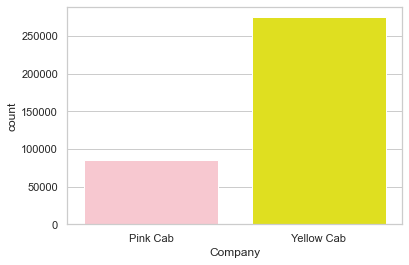

In [10]:
sns.set_theme(style="whitegrid")
Companies = sns.countplot(x="Company", palette=['Pink', 'Yellow'], data=df_cab)

### Changing the Date Format 

In [11]:
from datetime import datetime,timedelta

In [12]:
datetime.strftime(datetime(1899, 12, 30) + timedelta(days=43465), '%d/%m/%y')

'31/12/18'

In [13]:
df_cab['Date'] =df_cab['Date of Travel'].apply(lambda x: datetime.strftime(datetime(1899, 12, 30) + timedelta(days=x), '%d/%m/%y'))

In [14]:
df_cab=df_cab.drop(['Date of Travel'],axis=1)

In [15]:
df_cab

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,08/01/16
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,06/01/16
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,02/01/16
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,07/01/16
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,03/01/16
...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,08/01/18
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,04/01/18
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,05/01/18
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,05/01/18


### Calculating the Profit and adding a seperate column for Profit which will be our Target

In [16]:
df_cab['Profit']=df_cab['Price Charged']-df_cab['Cost of Trip']
df_cab

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,08/01/16,57.3150
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,06/01/16,23.6660
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,02/01/16,27.5680
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,07/01/16,25.7980
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,03/01/16,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,08/01/18,5.8800
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,04/01/18,6.9020
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,05/01/18,87.4200
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,05/01/18,32.1420


### Tried to Sort the Profit Column to know if there are Losses. 

In [17]:
df_cab.sort_values(by=['Profit']) # in some trips there are loss (observation in profit column)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit
118348,10145287,Pink Cab,DALLAS TX,44.80,317.54,537.6000,19/02/17,-220.0600
18954,10024048,Pink Cab,DALLAS TX,42.56,303.51,502.2080,13/04/16,-198.6980
54991,10069188,Yellow Cab,TUCSON AZ,44.07,415.37,592.3008,28/08/16,-176.9308
23384,10029696,Pink Cab,DALLAS TX,43.29,328.85,497.8350,04/05/16,-168.9850
115200,10141320,Pink Cab,DALLAS TX,48.00,354.36,518.4000,30/01/17,-164.0400
...,...,...,...,...,...,...,...,...
138732,10170703,Yellow Cab,NEW YORK NY,41.65,1918.14,509.7960,30/04/17,1408.3440
138548,10170519,Yellow Cab,NEW YORK NY,41.81,1981.05,556.9092,30/04/17,1424.1408
138766,10170737,Yellow Cab,NEW YORK NY,43.20,2013.95,580.6080,30/04/17,1433.3420
138669,10170640,Yellow Cab,NEW YORK NY,43.29,2016.70,571.4280,05/05/17,1445.2720


### Observed in some trips there are loss 

## Importing City.csv 
### - This file contains list of 
#### - US cities,
#### - Population 
#### - Number of cab users

In [18]:
df_city = pd.read_csv("City.csv")
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Info of City Dataset

In [19]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


### Data Shape (Number of Columns and Rows) for City Dataset

In [20]:
df_city.shape #  print the number of rows and columns of my DataFrame

(20, 3)

### Viewing the first 5 rows of City Dataset

In [21]:
df_city.head(5) # The head() function is used to get the first n rows.

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Viewing the last 5 rows of City Dataset

In [22]:
df_city.tail(5) # The tail() function is used to get the last n rows.

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


### Checking the Statistical Measure

In [23]:
df_city.describe() #The describe() method returns description of the data in the DataFrame

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


### Checking if any Null values

In [24]:
df_city.isnull().sum().sort_values(ascending=False) # prints the column with missing value.

City          0
Population    0
Users         0
dtype: int64

### Checking if any duplicates

In [25]:
df_city.duplicated().sum()

0

## Importing Customer_ID.csv
### - This file contains list of
### - Customer ID,
### - Gender
### - Age
### - Income

In [26]:
df_customer = pd.read_csv("Customer_ID.csv")
df_customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### Shape of the Data (the number of rows and columns)

In [27]:
df_customer.shape #  print the number of rows and columns of my DataFrame

(49171, 4)

### First 5 rows of Customer Data

In [28]:
df_customer.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### Checking Statistical Measure

In [29]:
df_customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


### Checking for Null Values

In [30]:
df_customer.isnull().sum().sort_values(ascending=False)

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

### Checking for Duplicate values

In [31]:
df_city.duplicated().sum()

0

## Importing Transaction_ID.csv
### - This file contains list of
### - Transaction ID
### - Customer ID
### - Payment_Mode


In [32]:
df_transaction = pd.read_csv("Transaction_ID.csv")
df_transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### Shape of the Data (Number of rows and columns)

In [33]:
df_transaction.shape

(440098, 3)

### Checking Statistical Measure

In [34]:
df_transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


### Checking for Null Values

In [35]:
df_transaction.isnull().sum().sort_values(ascending=False)

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### Checking for Duplicate Values

In [36]:
df_transaction.duplicated().sum()

0

## Merging Datasets 

In [37]:
df= df_cab.merge(df_transaction, on= 'Transaction ID').merge(df_customer, on ='Customer ID').merge(df_city, on = 'City')
df.head(10)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,08/01/16,57.3150,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,21/07/18,281.2772,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,23/11/18,194.6480,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,06/01/16,23.6660,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,21/04/18,253.9808,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,04/05/18,50.8912,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27/10/18,25.0960,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,02/01/16,27.5680,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,21/09/16,210.0920,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,23/06/17,118.9736,28712,Card,Male,53,11242,"814,885","24,701"


### Checking Info

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Date                359392 non-null  object 
 7   Profit              359392 non-null  float64
 8   Customer ID         359392 non-null  int64  
 9   Payment_Mode        359392 non-null  object 
 10  Gender              359392 non-null  object 
 11  Age                 359392 non-null  int64  
 12  Income (USD/Month)  359392 non-null  int64  
 13  Population          359392 non-null  object 
 14  Users               359392 non-null  object 
dtypes: float64(4), int64(4), object(7)

### Checking Statistical Measure

In [39]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000,60000.000000,65.000000,35000.000000


### Visualizing the Companies Count

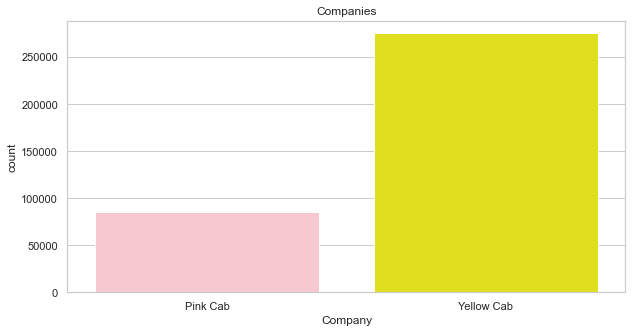

In [40]:
plt.figure(figsize=(10,5))
Companies = sns.countplot(x="Company", palette=['Pink', 'Yellow'], data=df_cab)
plt.title("Companies")
plt.show()

### Confirmation check for Null Values

In [41]:
df.isnull().sum().sort_values(ascending=False)

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Date                  0
Profit                0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

### Checking relationship between variables

In [42]:
cor=df.corr()
cor

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.087130,-0.016912,-0.001267,-0.001570
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.462768,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,0.835753,1.000000,0.859812,0.864154,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.486056,0.003077,-0.000189,-0.000633
Profit,-0.087130,0.462768,0.864154,0.486056,1.000000,-0.306527,-0.005093,0.006148
Customer ID,-0.016912,0.000389,-0.177324,0.003077,-0.306527,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.005093,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,0.006148,-0.013608,0.003907,1.000000


### We will change Age to Class format

In [43]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(10, 70, 10)]
df["Age group"] = pd.cut(df.Age, range(10,75, 10), right=False, labels=labels)
df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Age group
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,08/01/16,57.3150,29290,Card,Male,28,10813,"814,885","24,701",20 - 29
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,21/07/18,281.2772,29290,Cash,Male,28,10813,"814,885","24,701",20 - 29
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,23/11/18,194.6480,29290,Card,Male,28,10813,"814,885","24,701",20 - 29
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,06/01/16,23.6660,27703,Card,Male,27,9237,"814,885","24,701",20 - 29
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,21/04/18,253.9808,27703,Card,Male,27,9237,"814,885","24,701",20 - 29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,03/03/18,143.6180,51406,Cash,Female,29,6829,"418,859","127,001",20 - 29
359388,10319775,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,13/04/18,23.0464,51406,Cash,Female,29,6829,"418,859","127,001",20 - 29
359389,10347676,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,06/07/18,-5.8540,51406,Card,Female,29,6829,"418,859","127,001",20 - 29
359390,10358624,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,02/08/18,-6.0900,51406,Cash,Female,29,6829,"418,859","127,001",20 - 29


###  Columns Names

In [44]:
df.columns

Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Date', 'Profit', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users',
       'Age group'],
      dtype='object')

### Multivariate analysis to check the relationship between Profit and 'Company','Price Charged','Cost of Trip','Age','KM Travelled'.

In [45]:
df.groupby(['Company','Price Charged','Cost of Trip','Age','KM Travelled'])['Profit'].mean()


Company     Price Charged  Cost of Trip  Age  KM Travelled
Pink Cab    15.60          21.3840       34   1.98              -5.7840
            15.75          24.7800       32   2.10              -9.0300
            16.38          19.3800       43   1.90              -3.0000
            16.53          19.2000       57   1.92              -2.6700
            16.76          19.9820       18   1.94              -3.2220
                                                                ...    
Yellow Cab  1981.05        556.9092      37   41.81           1424.1408
            1993.83        594.7200      60   47.20           1399.1100
            2013.95        580.6080      64   43.20           1433.3420
            2016.70        571.4280      37   43.29           1445.2720
            2048.03        584.0640      18   46.80           1463.9660
Name: Profit, Length: 359386, dtype: float64

### Observing Graph of Company vs Profit 
### - Noticed Yellow Cab have more Profit 

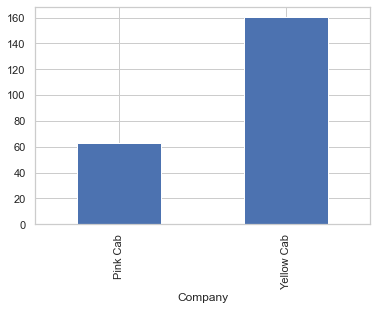

In [46]:
graph_1 =df.groupby(['Company'])['Profit'].mean().plot(kind='bar')

### Observing Graph of Age vs Profit 
### - Noted Age groups from 20-49 creates more Profit 

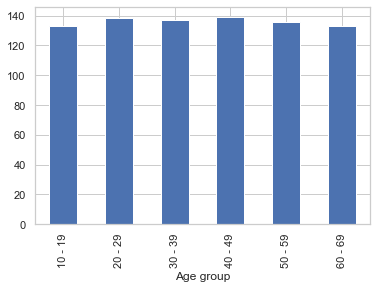

In [47]:
graph_2 = df.groupby(['Age group'])['Profit'].mean().plot(kind='bar')

### Profit per cabs

<AxesSubplot:title={'center':"Profit made by both the Company's "}, ylabel='Profit'>

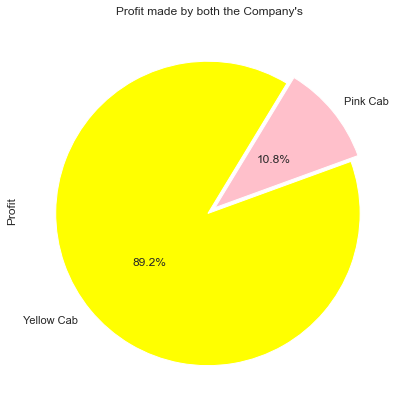

In [48]:
plt.title("Profit made by both the Company's ")
df.groupby('Company')['Profit'].sum().plot(kind='pie',y='Company',startangle=20,colors = ("pink", "yellow") ,figsize=(15,7),autopct='%1.1f%%',explode=[0.03]*2,pctdistance=0.5)

In [49]:
np.dtype(df['Date'])

dtype('O')

In [50]:
df['Date']=pd.to_datetime(df['Date'])

In [51]:
df.groupby([df['Date'].dt.year,'Company'])['Profit'].mean()

Date  Company   
2016  Pink Cab       68.321819
      Yellow Cab    169.347821
2017  Pink Cab       67.070839
      Yellow Cab    168.817057
2018  Pink Cab       53.229689
      Yellow Cab    143.416122
Name: Profit, dtype: float64

## Areas to investigate:

### Q.1) Which company has maximum cab users at a particular time period?

In [52]:
df.groupby([df['Date'].dt.year,'Company'])['Customer ID'].count()

Date  Company   
2016  Pink Cab      25080
      Yellow Cab    82239
2017  Pink Cab      30321
      Yellow Cab    98189
2018  Pink Cab      29310
      Yellow Cab    94253
Name: Customer ID, dtype: int64

### In 2016, 2017 and 2018, Yellow cab has maximum customers

In [53]:
df.groupby([df['Date'].dt.year,'Company'])['Profit'].mean()

Date  Company   
2016  Pink Cab       68.321819
      Yellow Cab    169.347821
2017  Pink Cab       67.070839
      Yellow Cab    168.817057
2018  Pink Cab       53.229689
      Yellow Cab    143.416122
Name: Profit, dtype: float64

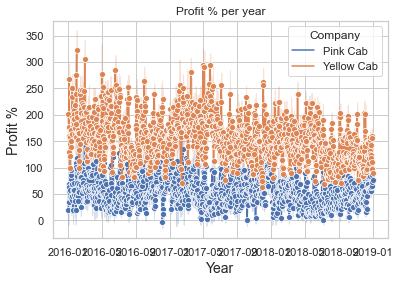

In [54]:
sns.lineplot(x='Date', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

### Q.2) Does margin proportionally increase with increase in number of customers?

In [55]:
df.groupby([df['Date'].dt.year,'Company'])['Income (USD/Month)'].mean() 

Date  Company   
2016  Pink Cab      15124.241587
      Yellow Cab    15034.414900
2017  Pink Cab      15058.789123
      Yellow Cab    15069.108974
2018  Pink Cab      15003.528420
      Yellow Cab    15031.072146
Name: Income (USD/Month), dtype: float64

### - Outcome: Yellow Cab Company has got higher Income and Customers as compared to Pink Cab Company

### Q.3) What are the attributes of these customer segments? 

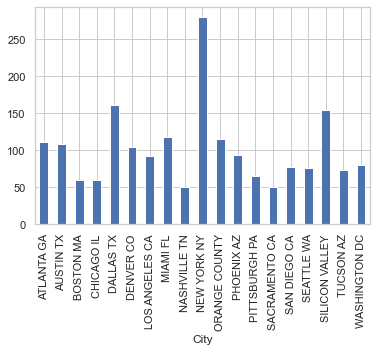

In [56]:
graph_3 = df.groupby(['City'])['Profit'].mean().plot(kind='bar')

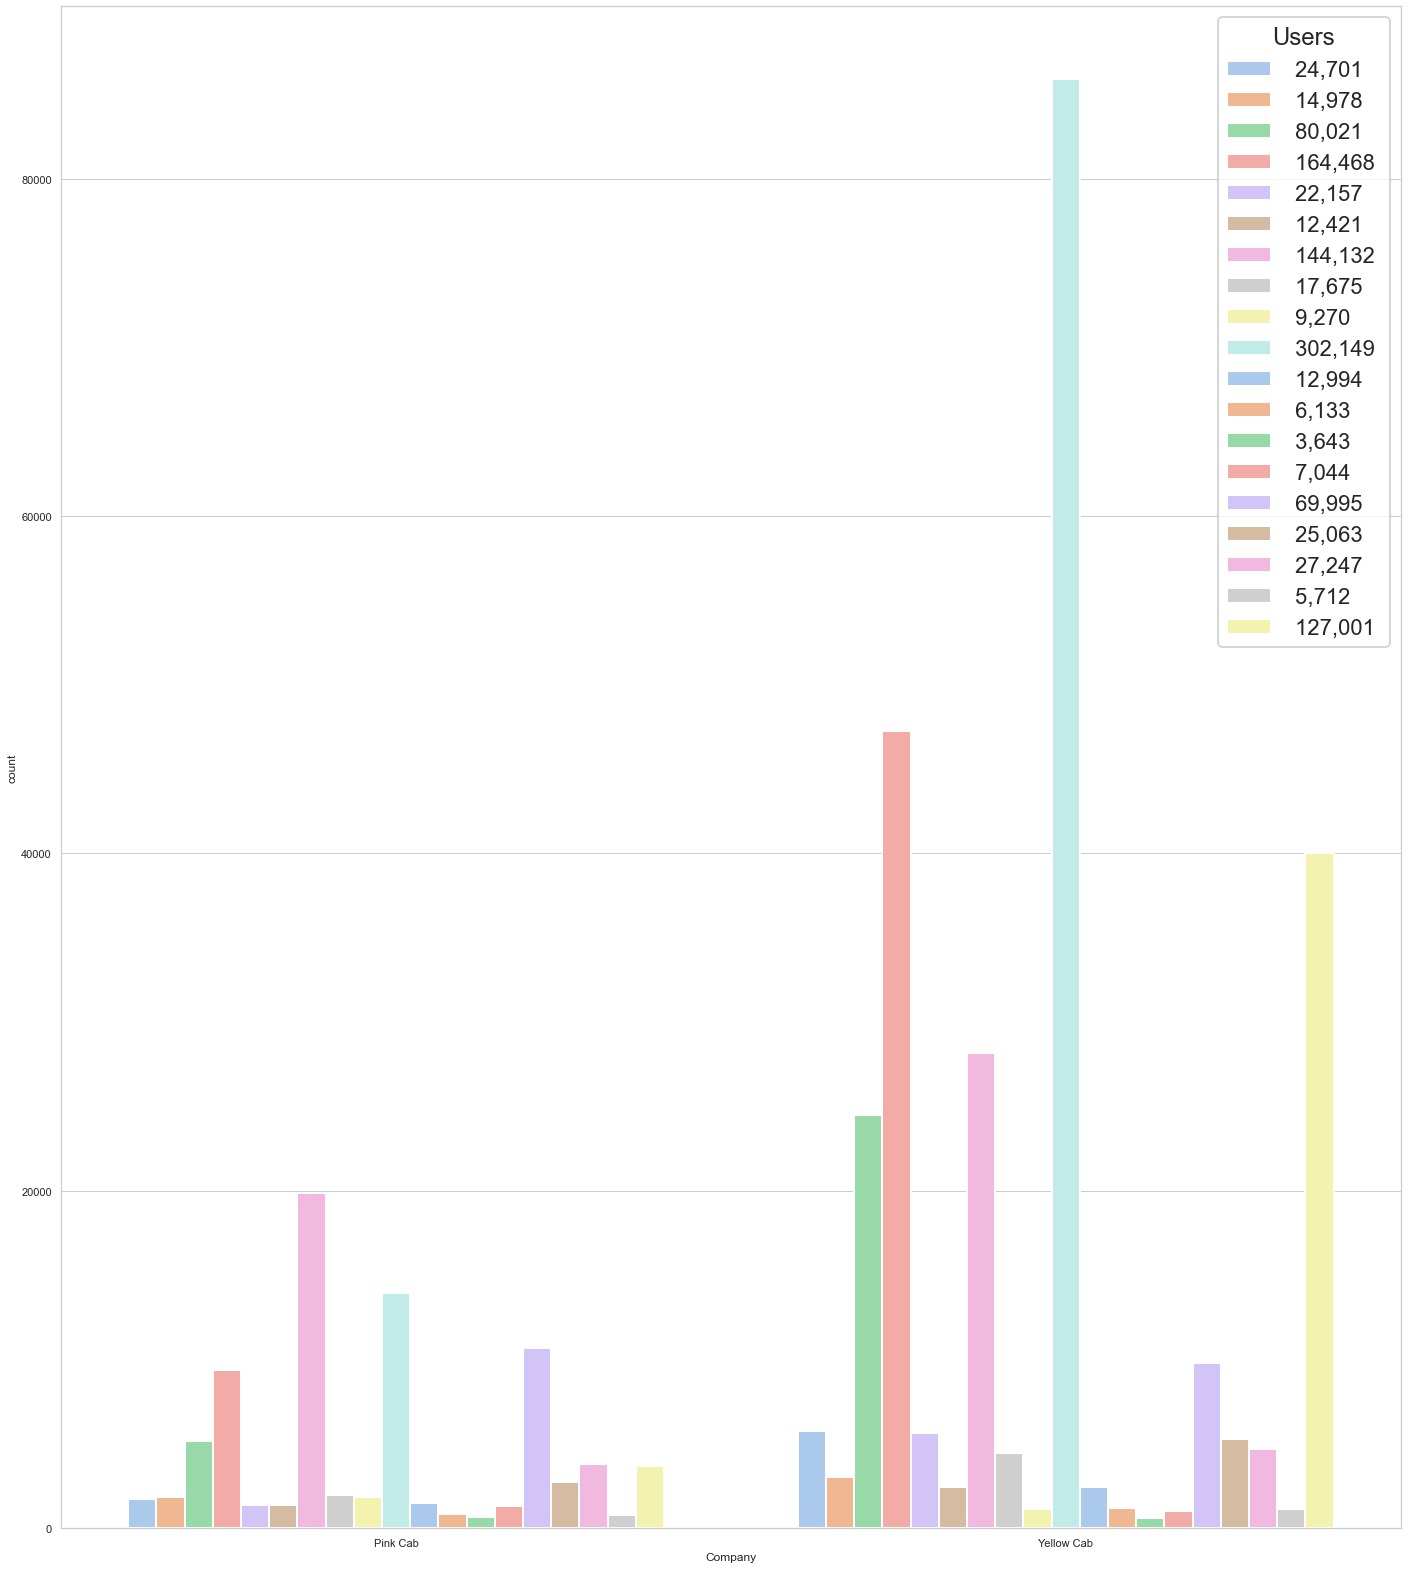

In [57]:
f, ax = plt.subplots(figsize=(24, 28))
sns.set_context('poster', font_scale = 1)
ax = sns.countplot(x='Company', hue='Users', palette='pastel', data=df)
plt.show()

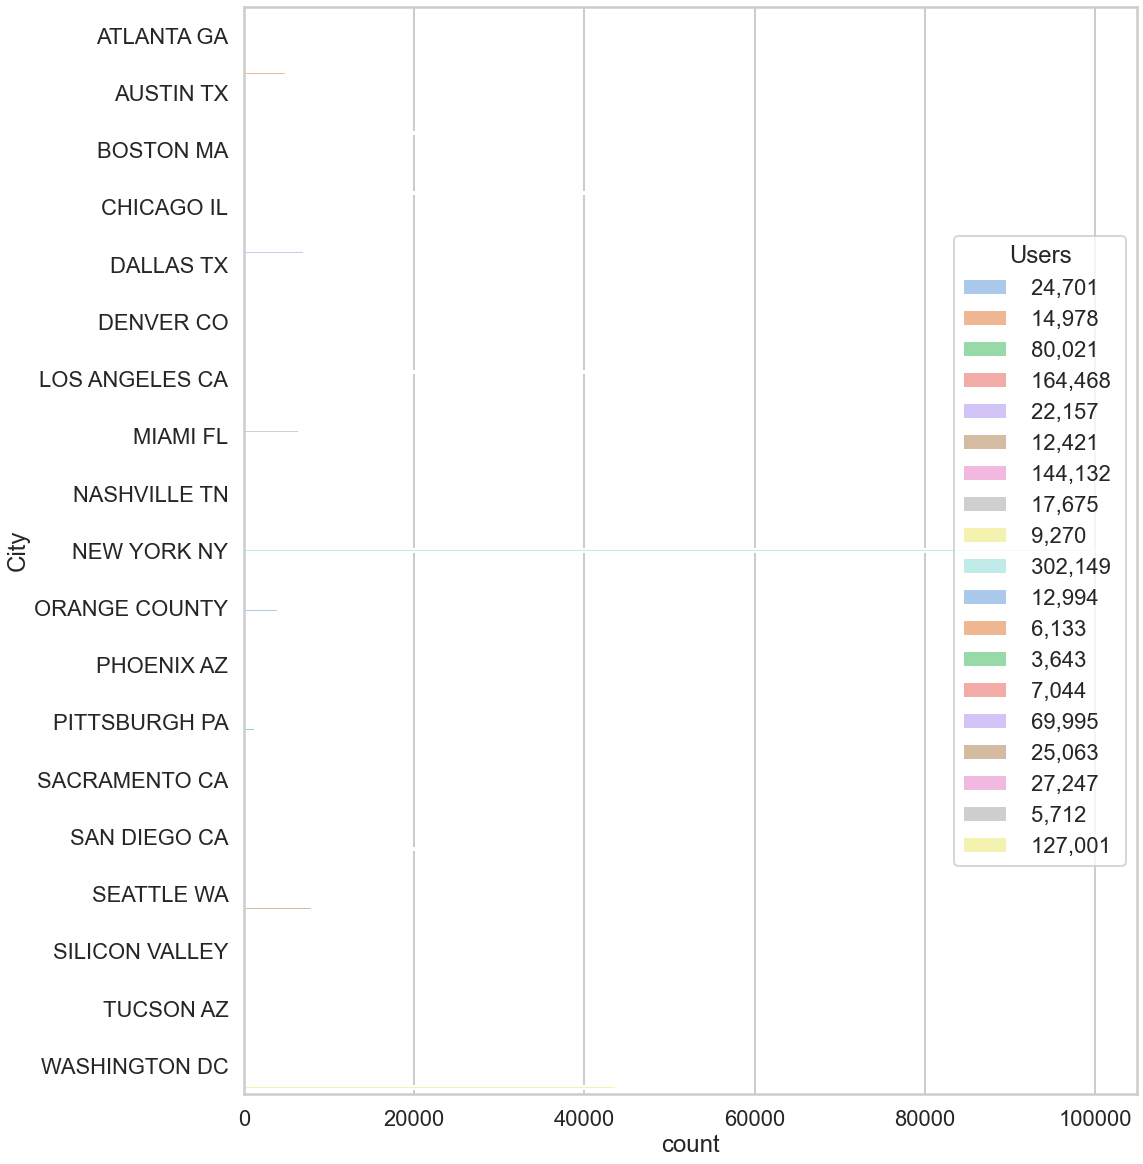

In [58]:
f, city_comparison = plt.subplots(figsize=(16, 20))
city_comparison = sns.countplot(y='City', hue='Users',  palette='pastel', data=df)
plt.show()

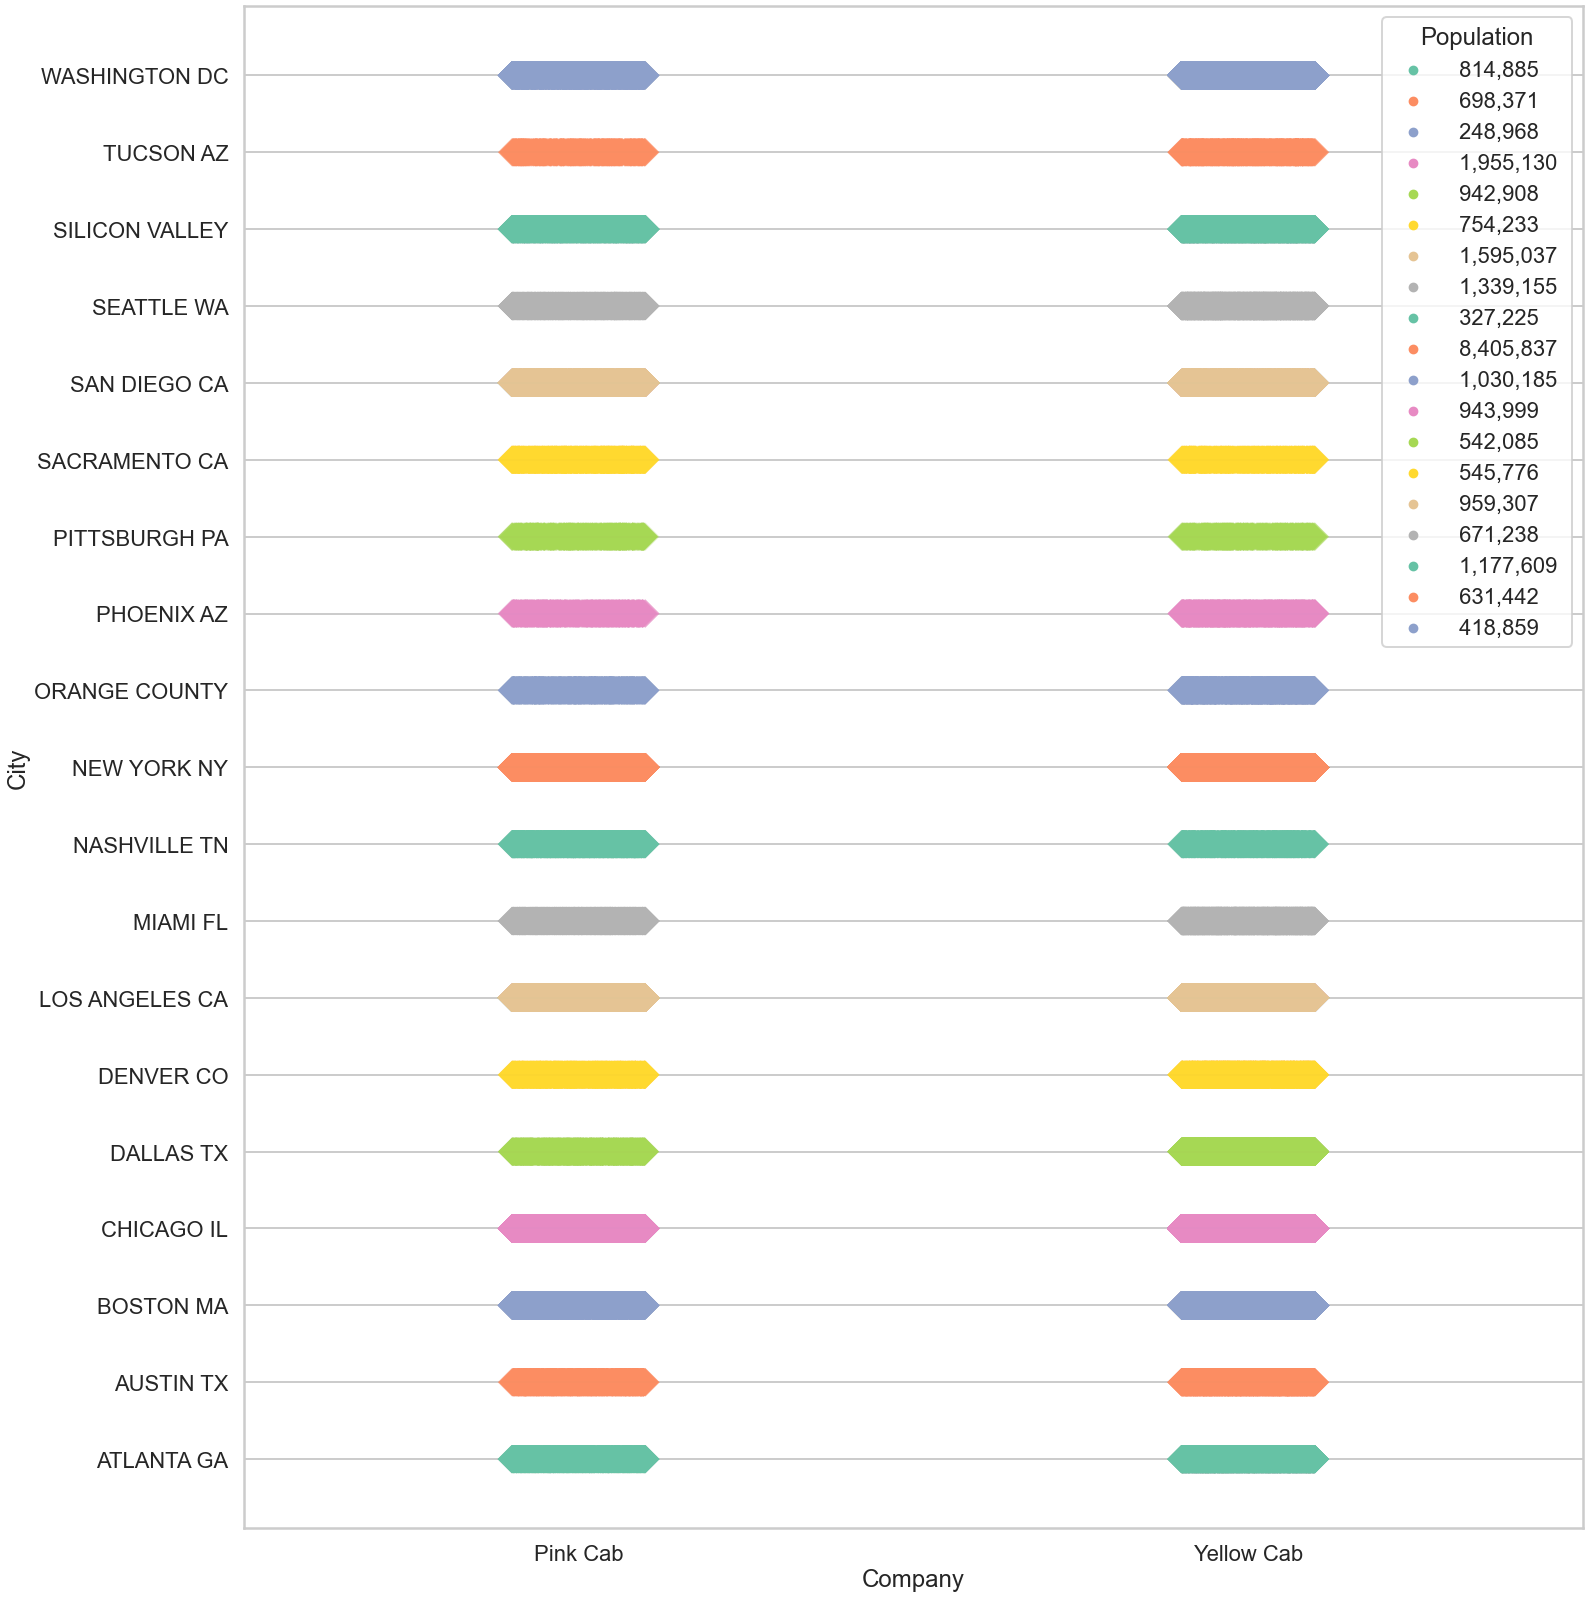

In [59]:
f, ax = plt.subplots(figsize=(24, 28))
sns.stripplot(x="Company", y="City", hue="Population",
                   data=df, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)
plt.show()


In [60]:
df.groupby([df['Date'].dt.year,'Payment_Mode'])['Profit'].mean()

Date  Payment_Mode
2016  Card            145.766499
      Cash            145.696508
2017  Card            144.780134
      Cash            144.856528
2018  Card            121.580234
      Cash            122.689278
Name: Profit, dtype: float64

In [61]:
df.groupby([df['Date'].dt.year,'Company'])['KM Travelled'].count()

Date  Company   
2016  Pink Cab      25080
      Yellow Cab    82239
2017  Pink Cab      30321
      Yellow Cab    98189
2018  Pink Cab      29310
      Yellow Cab    94253
Name: KM Travelled, dtype: int64

In [62]:
df.groupby([df['Date'].dt.year,'Company'])['Cost of Trip'].count()

Date  Company   
2016  Pink Cab      25080
      Yellow Cab    82239
2017  Pink Cab      30321
      Yellow Cab    98189
2018  Pink Cab      29310
      Yellow Cab    94253
Name: Cost of Trip, dtype: int64

In [63]:
df.groupby([df['Date'].dt.year,'Company'])['Income (USD/Month)'].count()

Date  Company   
2016  Pink Cab      25080
      Yellow Cab    82239
2017  Pink Cab      30321
      Yellow Cab    98189
2018  Pink Cab      29310
      Yellow Cab    94253
Name: Income (USD/Month), dtype: int64

In [64]:
df.groupby([df['Date'].dt.year,'Company'])['Age group'].count()

Date  Company   
2016  Pink Cab      25080
      Yellow Cab    82239
2017  Pink Cab      30321
      Yellow Cab    98189
2018  Pink Cab      29310
      Yellow Cab    94253
Name: Age group, dtype: int64

In [65]:
df.groupby([df['Date'].dt.year,'Age group'])['Profit'].count()

Date  Age group
2016  10 - 19       6606
      20 - 29      34704
      30 - 39      33884
      40 - 49      13885
      50 - 59      11445
      60 - 69       6795
2017  10 - 19       8208
      20 - 29      41717
      30 - 39      40004
      40 - 49      16899
      50 - 59      13554
      60 - 69       8128
2018  10 - 19       7623
      20 - 29      40009
      30 - 39      38847
      40 - 49      16233
      50 - 59      13088
      60 - 69       7763
Name: Profit, dtype: int64

### - Some Important Findings based on Question #3

#### a) Payment mode does not looks so important as both Card and Cash not making much difference.

#### b) Yellow Cab Travelled more Kilometers as compared to Pink Cab. So Kilometers Travelled by each cab and the availability of more cabs can be          an important factor of getting more Customers.

#### c) The Cost of Trip is higher for Yellow Cab as compared to Pink Cab because Yellow Cab had more trips and travelled more kilometers.

#### d) Yellow cab company has much more income than pink cab company, since it has more customers.

#### e) When compared with Age group in the year 2016 , 2017 and 2018 people aged between 20-39 might have used more cab services as compared to other Age groups.

### 1) Rides to which city made more Profit? 
#### -New York NY
### 2)Which City is in high demand for cab users?  
#### -New York NY
### 3)Which Company has more Users? 
#### -Yellow Cab with 302,149
### 4)Which City has highest Population?
#### -New York Ny with 8,405,837

## Analysis
### Create multiple hypothesis and investigate:


In [66]:
#Example :- you have 10 ages and you are checking whether avg age is 30 or not. (check code below for that using python)
#ages = np.genfromtxt(“ages.csv”)
#print(ages)
#ages_mean = np.mean(ages)
#print(ages_mean)
#tset, pval = ttest_1samp(ages, 30)
#print(“p-values”,pval)
#if pval < 0.05:    # alpha value is 0.05 or 5%
 #  print(" we are rejecting null hypothesis")
#else:
#  print("we are accepting null hypothesis")

### - Hypothesis Testing based on Payment Mode and Profit

In [67]:
cash = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
card = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(cash.shape[0],card.shape[0])
_, p_value = stats.ttest_ind(cash.values,card.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):  # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis and it says that there is a difference regarding Payment Mode and Yellow Cab")
else:
    print("We are accepting null hypothesis that there is no difference noted regarding Payment Mode and Yellow Cab")

109896 164785
P value is  0.2933060638298729
We are accepting null hypothesis that there is no difference noted regarding Payment Mode and Yellow Cab


In [68]:
cash = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
card = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(cash.shape[0],card.shape[0])
_, p_value = stats.ttest_ind(cash.values,card.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):  # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis and it says that there is a difference regarding Payment Mode and Pink Cab")
else:
    print("We are accepting null hypothesis that there is no difference noted regarding Payment Mode and Pink Cab")

33992 50719
P value is  0.7900465828793288
We are accepting null hypothesis that there is no difference noted regarding Payment Mode and Pink Cab


### - Hypothesis Testing based on Age and Profit

In [69]:
x = df[(df.Age <= 40)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df.Age >= 40)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(x.shape[0],y.shape[0])
_, p_value = stats.ttest_ind(x.values,y.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):  # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis and it says that there is a difference regarding Age and Yellow Cab")
else:
    print("We are accepting null hypothesis that there is no difference noted regarding Age and Yellow Cab")

201029 82454
P value is  0.44246196729249976
We are accepting null hypothesis that there is no difference noted regarding Age and Yellow Cab


In [70]:
x = df[(df.Age <= 40)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
y = df[(df.Age >= 40)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(x.shape[0],y.shape[0])
_, p_value = stats.ttest_ind(x.values,y.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):  # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis and it says that there is a difference regarding Age and Pink Cab")
else:
    print("We are accepting null hypothesis that there is no difference noted regarding Age and Pink Cab")

62109 25336
P value is  0.09093510590632374
We are accepting null hypothesis that there is no difference noted regarding Age and Pink Cab


## Outlier Detection and Removal

### `Outlier Detection on Kilometers Travelled.` - Noticed there are no outliers

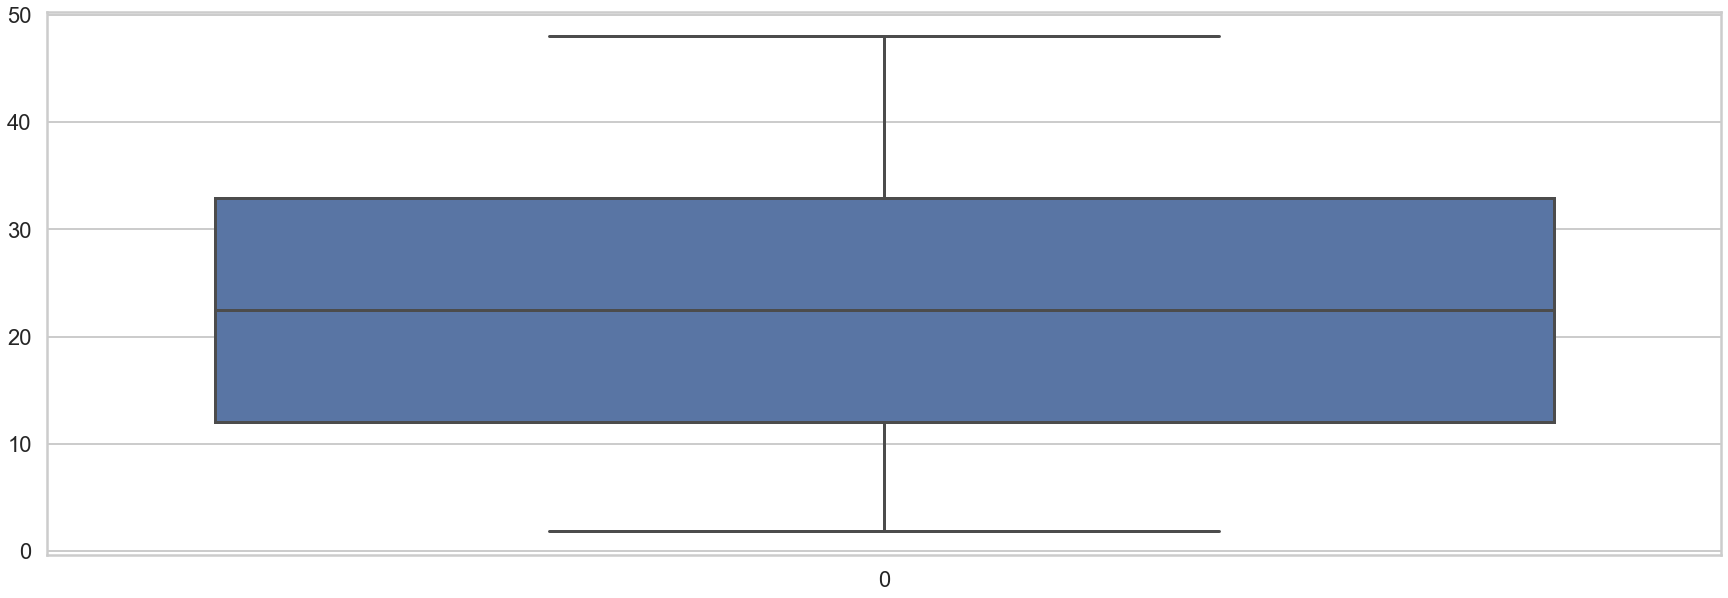

In [71]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['KM Travelled'])
plt.show()

### `Outlier Detection on Price Charged.` - Noticed there are Outliers

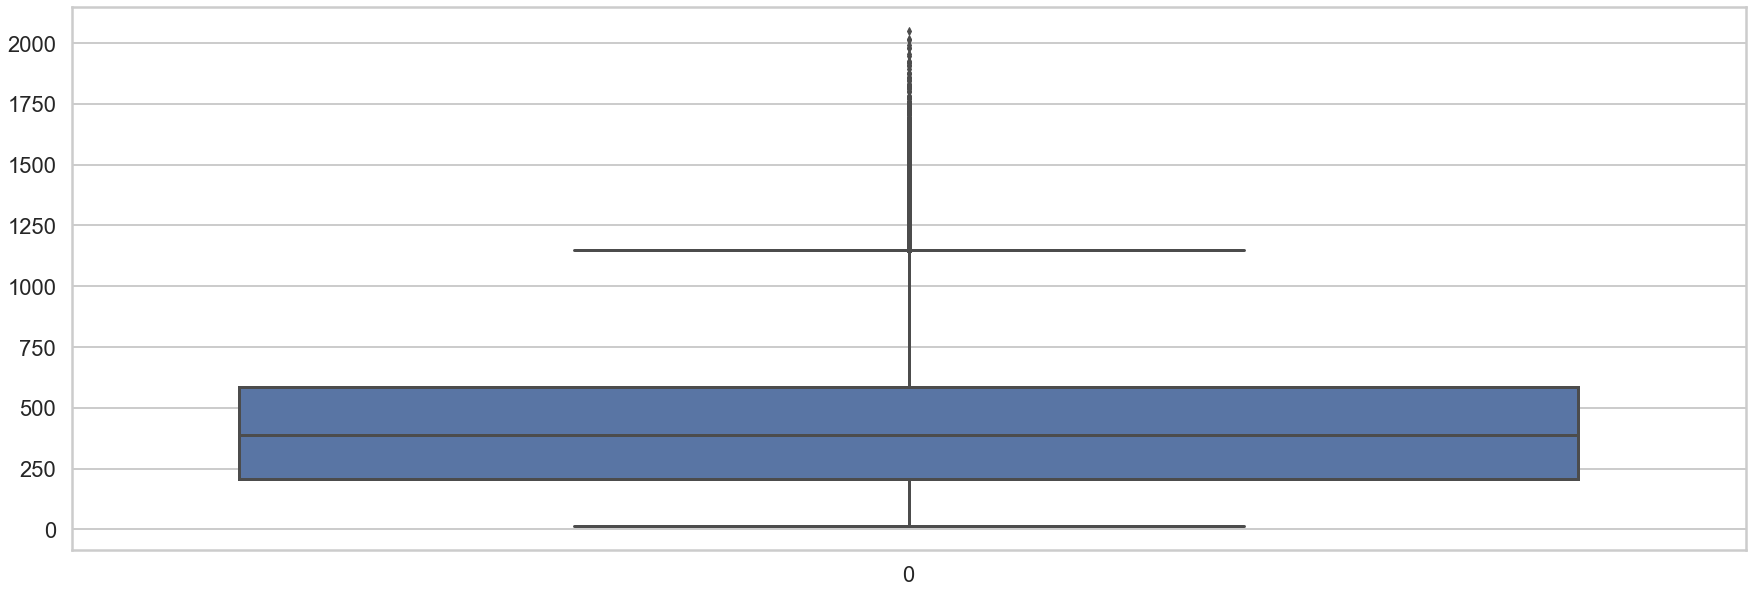

In [72]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['Price Charged'])
plt.show()

In [73]:
len(np.where(df['Price Charged']>1200)[0])/len(df)

0.012139947466832873

### `Outlier Detection on Profit.` - Noticed there are Outliers

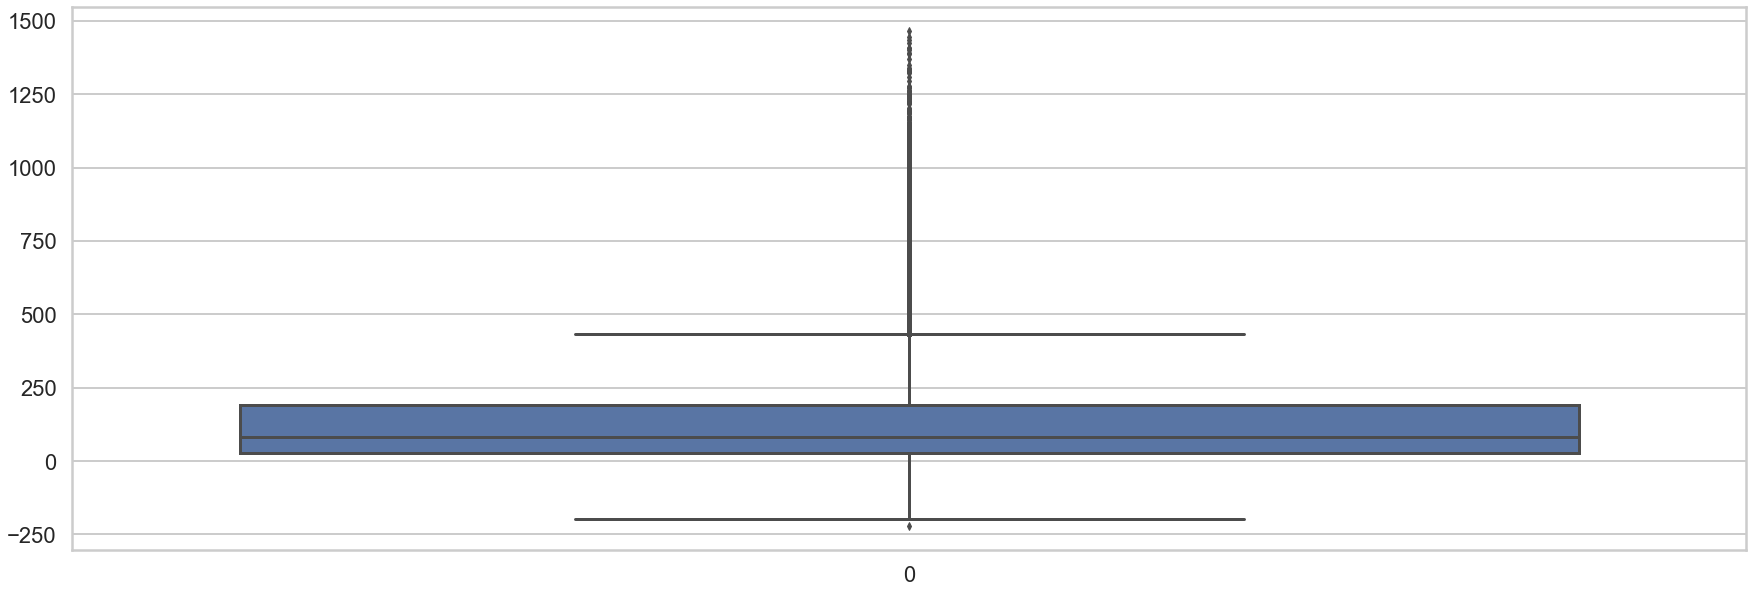

In [74]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['Profit'])
plt.show()

In [75]:
len(np.where(df['Profit']>450)[0])/len(df)

0.05926119668773929

### `Outlier Detection on Age.` - Noticed there are no Outliers

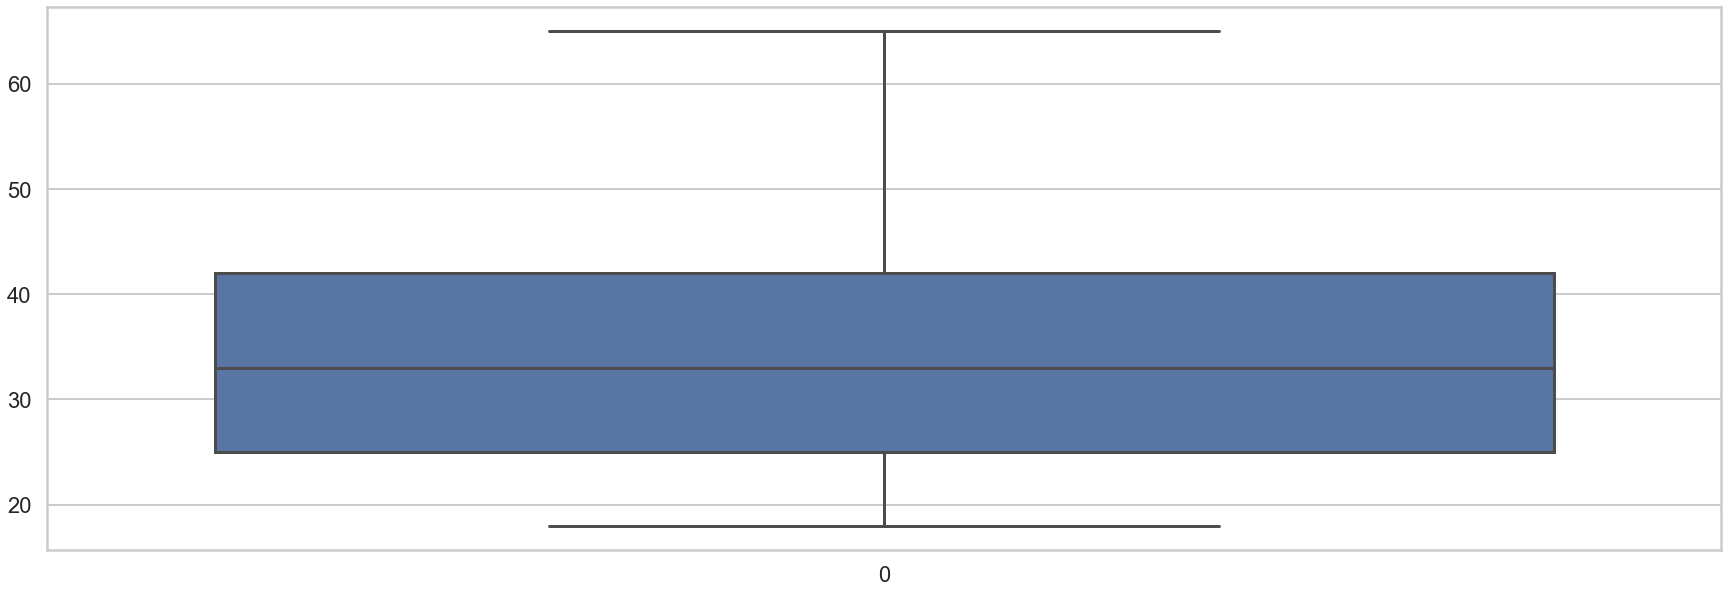

In [76]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['Age'])
plt.show()

### `Outlier Detection on Income.` - Noticed there are no Outliers

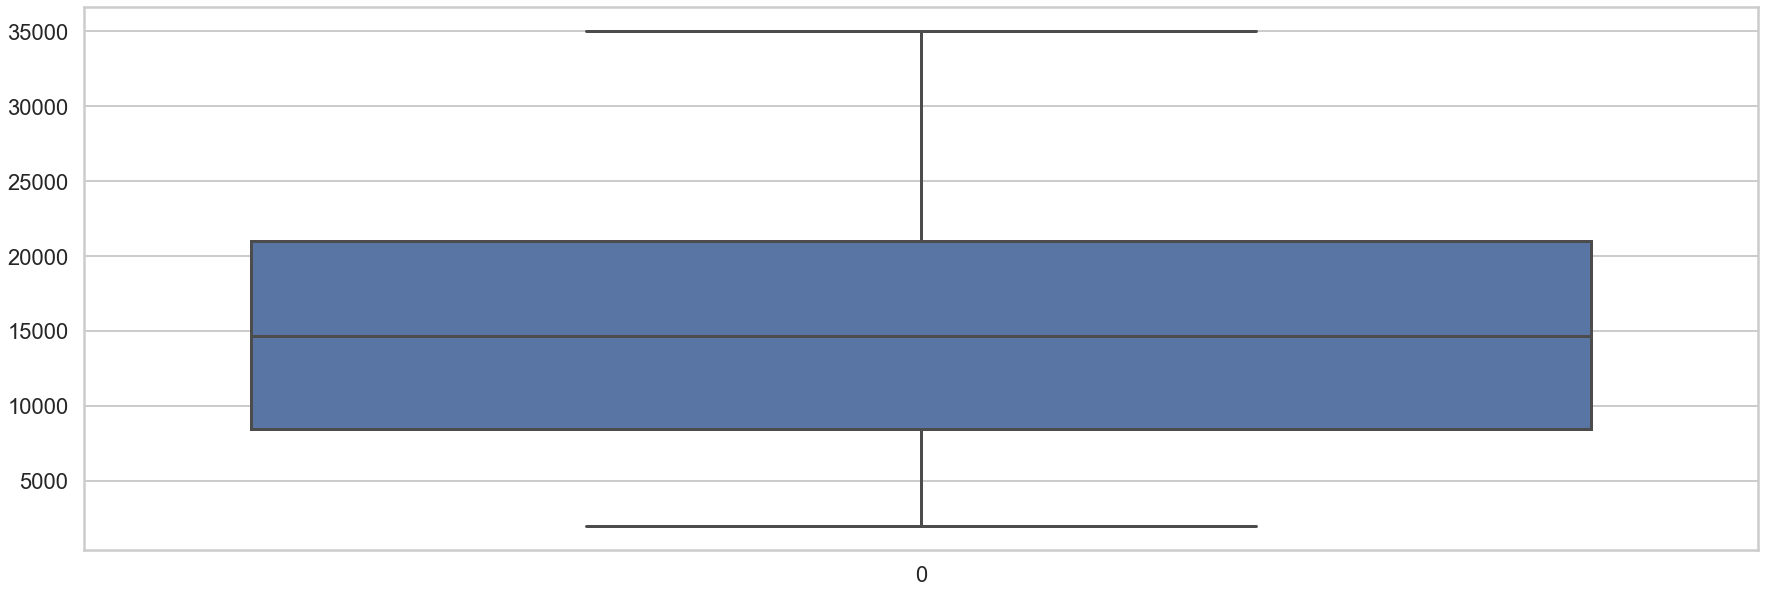

In [77]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['Income (USD/Month)'])
plt.show()

### `Outlier Detection on Cost of Trip.` - Noticed there are no Outliers

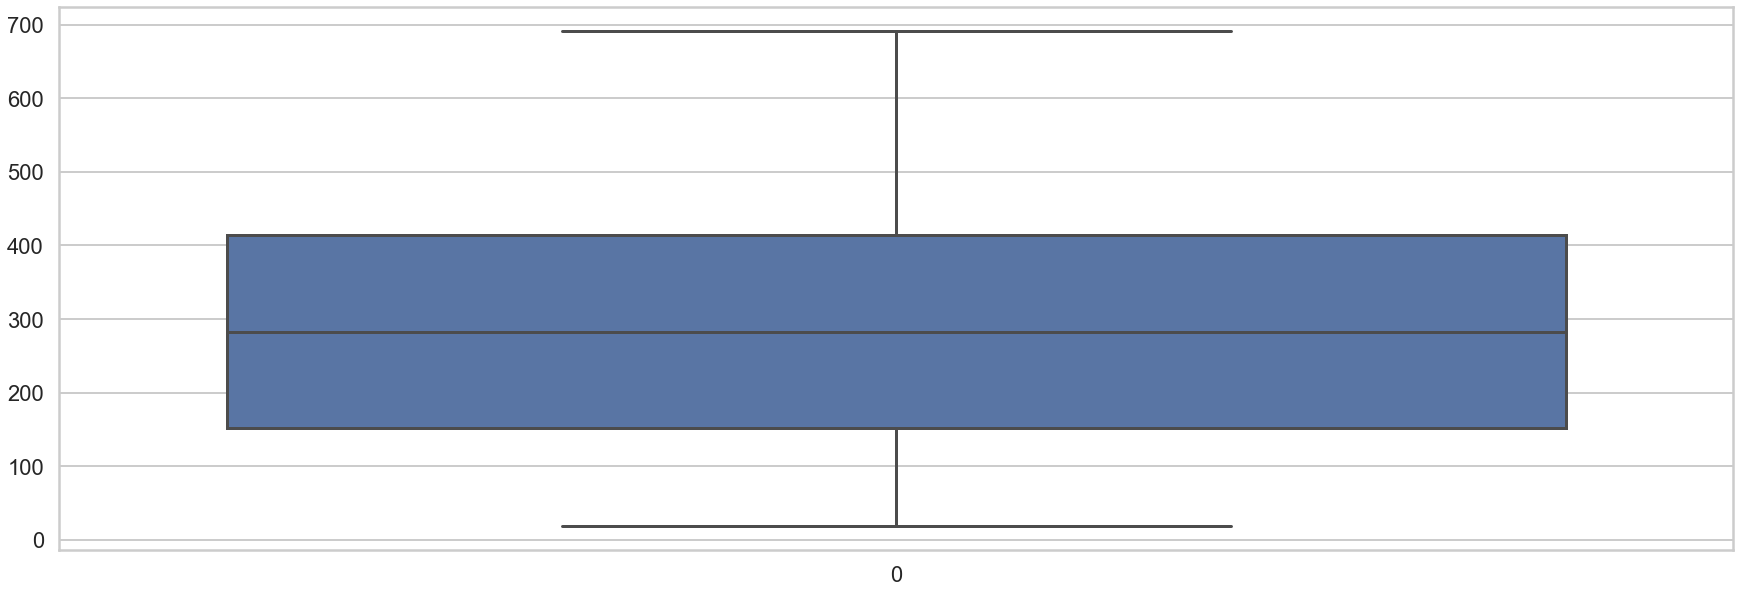

In [78]:
plt.figure(figsize=(30,10), facecolor='w')
sns.boxplot(data=df['Cost of Trip'])
plt.show()

In [79]:
df['z_profit']=np.abs(stats.zscore(df.Profit))
print("Removing Outliers: ", len(df[df['z_profit']>3]))

Removing Outliers:  7244


In [80]:
df = df[df['z_profit']<3]

In [81]:
df['z_price_charged']=np.abs(stats.zscore(df['Price Charged']))
print("Removing Outliers: ", len(df[df['z_price_charged']>3]))

Removing Outliers:  579


In [82]:
df = df[df['z_price_charged']<3]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351569 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      351569 non-null  int64         
 1   Company             351569 non-null  object        
 2   City                351569 non-null  object        
 3   KM Travelled        351569 non-null  float64       
 4   Price Charged       351569 non-null  float64       
 5   Cost of Trip        351569 non-null  float64       
 6   Date                351569 non-null  datetime64[ns]
 7   Profit              351569 non-null  float64       
 8   Customer ID         351569 non-null  int64         
 9   Payment_Mode        351569 non-null  object        
 10  Gender              351569 non-null  object        
 11  Age                 351569 non-null  int64         
 12  Income (USD/Month)  351569 non-null  int64         
 13  Population          351569 no

In [84]:
df.columns

Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Date', 'Profit', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users',
       'Age group', 'z_profit', 'z_price_charged'],
      dtype='object')

In [85]:
data=df[['Company', 'City', 'KM Travelled', 'Price Charged','Cost of Trip','Profit','Payment_Mode','Gender', 'Income (USD/Month)', 'Population', 'Users','Age']]

In [86]:
data.columns

Index(['Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip',
       'Profit', 'Payment_Mode', 'Gender', 'Income (USD/Month)', 'Population',
       'Users', 'Age'],
      dtype='object')

## Label Encoding

In [87]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()

In [88]:
lb.fit(data['Company'])

LabelEncoder()

In [89]:
classes= list(lb.classes_)

In [90]:
classes

['Pink Cab', 'Yellow Cab']

In [91]:
data['companies']= lb.fit_transform(data['Company'])

In [92]:
data.head(5)

,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Payment_Mode,Gender,Income (USD/Month),Population,Users,Age,companies
0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Card,Male,10813,"814,885","24,701",28,0
1,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Cash,Male,10813,"814,885","24,701",28,1
2,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Card,Male,10813,"814,885","24,701",28,1
3,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Card,Male,9237,"814,885","24,701",27,0
4,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Card,Male,9237,"814,885","24,701",27,1


### 0 is for Pink Cab and 1 is for Yellow Cab

In [93]:
data["companies"].value_counts()

1    266887
0     84682
Name: companies, dtype: int64

In [94]:
data['companies'].nunique() # printing number of companies

2

### Dropping Features ["Gender","Payment_Mode","City"] so that I have only numerical values for modeling

In [95]:
data.drop(["Gender","Payment_Mode","City",], axis=1, inplace=True)

In [96]:
data.head()

,Company,KM Travelled,Price Charged,Cost of Trip,Profit,Income (USD/Month),Population,Users,Age,companies
0,Pink Cab,30.45,370.95,313.6350,57.3150,10813,"814,885","24,701",28,0
1,Yellow Cab,26.19,598.70,317.4228,281.2772,10813,"814,885","24,701",28,1
2,Yellow Cab,42.55,792.05,597.4020,194.6480,10813,"814,885","24,701",28,1
3,Pink Cab,28.62,358.52,334.8540,23.6660,9237,"814,885","24,701",27,0
4,Yellow Cab,36.38,721.10,467.1192,253.9808,9237,"814,885","24,701",27,1


### Found Company with name Yellow Cab and Pink Cab . I have already converted 0 for Pink Cab and 1 for Yellow Cab and the column is already shown so removing the extra column with categorical variables.

In [97]:
data.drop("Company",axis=1)

,KM Travelled,Price Charged,Cost of Trip,Profit,Income (USD/Month),Population,Users,Age,companies
0,30.45,370.95,313.6350,57.3150,10813,"814,885","24,701",28,0
1,26.19,598.70,317.4228,281.2772,10813,"814,885","24,701",28,1
2,42.55,792.05,597.4020,194.6480,10813,"814,885","24,701",28,1
3,28.62,358.52,334.8540,23.6660,9237,"814,885","24,701",27,0
4,36.38,721.10,467.1192,253.9808,9237,"814,885","24,701",27,1
...,...,...,...,...,...,...,...,...,...
359387,38.40,668.93,525.3120,143.6180,6829,"418,859","127,001",29,1
359388,3.57,67.60,44.5536,23.0464,6829,"418,859","127,001",29,1
359389,23.46,331.97,337.8240,-5.8540,6829,"418,859","127,001",29,1
359390,27.60,358.23,364.3200,-6.0900,6829,"418,859","127,001",29,1


In [98]:
data.columns

Index(['Company', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit',
       'Income (USD/Month)', 'Population', 'Users', 'Age', 'companies'],
      dtype='object')

### String values noted while Normalizing

In [99]:
data.Population = data.Population.str.replace(',','').astype(float)
data.Users = data.Users.str.replace(',','').astype(float) # string values noted while normalizing

### Splitting Data into Training and Test Set

In [100]:
X = data[['KM Travelled', 'Price Charged', 'Cost of Trip',
       'Profit','Age', 'Income (USD/Month)',
       'Population', 'Users', ]]
y = data['Profit']

In [101]:
X

,KM Travelled,Price Charged,Cost of Trip,Profit,Age,Income (USD/Month),Population,Users
0,30.45,370.95,313.6350,57.3150,28,10813,814885.0,24701.0
1,26.19,598.70,317.4228,281.2772,28,10813,814885.0,24701.0
2,42.55,792.05,597.4020,194.6480,28,10813,814885.0,24701.0
3,28.62,358.52,334.8540,23.6660,27,9237,814885.0,24701.0
4,36.38,721.10,467.1192,253.9808,27,9237,814885.0,24701.0
...,...,...,...,...,...,...,...,...
359387,38.40,668.93,525.3120,143.6180,29,6829,418859.0,127001.0
359388,3.57,67.60,44.5536,23.0464,29,6829,418859.0,127001.0
359389,23.46,331.97,337.8240,-5.8540,29,6829,418859.0,127001.0
359390,27.60,358.23,364.3200,-6.0900,29,6829,418859.0,127001.0


In [102]:
y

0          57.3150
1         281.2772
2         194.6480
3          23.6660
4         253.9808
            ...   
359387    143.6180
359388     23.0464
359389     -5.8540
359390     -6.0900
359391     25.7948
Name: Profit, Length: 351569, dtype: float64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [104]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(281255, 8)
(70314, 8)
(281255,)
(70314,)


In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281255 entries, 238548 to 122173
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   KM Travelled        281255 non-null  float64
 1   Price Charged       281255 non-null  float64
 2   Cost of Trip        281255 non-null  float64
 3   Profit              281255 non-null  float64
 4   Age                 281255 non-null  int64  
 5   Income (USD/Month)  281255 non-null  int64  
 6   Population          281255 non-null  float64
 7   Users               281255 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 19.3 MB


### Normalizing

In [106]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

Coefficients:  [ 6.20007014e-12  1.58726582e+03 -9.37039551e+02 -3.21844275e+02
  6.08291195e-13  3.12638804e-13 -3.41060513e-13  7.10542736e-14]


### Cross Validation 

In [108]:

def get_cross_val(model, X_train, y_train, X_valid, y_valid):
    
    # Fit on train, predict on validation
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    # Cross validation score over 10 folds
    scores = cross_val_score(clf, X_train, y_train, cv=10)
    print("Cross validation over 10 folds: ", sum(scores)/10.0)
    
    return y_pred

## Applying Linear Regression Model

In [109]:
Model = 'Linear Regression'
lin_predicted = reg.predict(X_test)
lin_acc_score = reg.score(X_train, y_train)
print("LinearRegression:",lin_acc_score*100,'\n')
get_cross_val(reg, X_train, y_train, X_test, y_test)

LinearRegression: 100.0 

Cross validation over 10 folds:  1.0


array([113.902 , 118.9316,  55.    , ...,  27.682 , 246.5196, 146.3204])

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

In [111]:
# Make predictions using the testing set
y_pred = reg.predict(X_test)


In [112]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00


In [113]:
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))



Coefficients: 
 [ 6.20007014e-12  1.58726582e+03 -9.37039551e+02 -3.21844275e+02
  6.08291195e-13  3.12638804e-13 -3.41060513e-13  7.10542736e-14]
Mean squared error: 0.00
Coefficient of determination: 1.00


## Conclusion

#### From the data it is noted that the rides to New York have got more users which in turn have increased the income and profit of the firm.

#### It is well noted that Yellow cab is an outstanding performer as compared to Pink cab.

#### The demand for Yellow cab was higher as compared to Pink cab as it travelled longer kilometers as compared to pink cab and while taking the case of the availability for more cab was there even though many of yellow cab have gone for longer trips.

#### The price charged by Yellow cab as compared to Pink cab was higher because Yellow Cab had covered more longer trips than Pink Cab. 

